In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
data_reading = pd.read_csv("GOOGL.csv")
data_reading.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
data_reading.shape

(4431, 7)

In [6]:
data_reading.info

<bound method DataFrame.info of             Date         Open         High          Low        Close  \
0     2004-08-19    50.050049    52.082081    48.028027    50.220219   
1     2004-08-20    50.555557    54.594597    50.300301    54.209209   
2     2004-08-23    55.430431    56.796799    54.579578    54.754753   
3     2004-08-24    55.675674    55.855858    51.836838    52.487488   
4     2004-08-25    52.532532    54.054054    51.991993    53.053055   
...          ...          ...          ...          ...          ...   
4426  2022-03-18  2668.489990  2724.879883  2645.169922  2722.510010   
4427  2022-03-21  2723.270020  2741.000000  2681.850098  2722.030029   
4428  2022-03-22  2722.030029  2821.000000  2722.030029  2797.360107   
4429  2022-03-23  2774.050049  2791.770020  2756.699951  2765.510010   
4430  2022-03-24  2784.000000  2832.379883  2755.010010  2831.439941   

        Adj Close    Volume  
0       50.220219  44659096  
1       54.209209  22834343  
2       54.75

In [7]:
data_reading.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [51]:
palette = ['#F79420','#F79420']

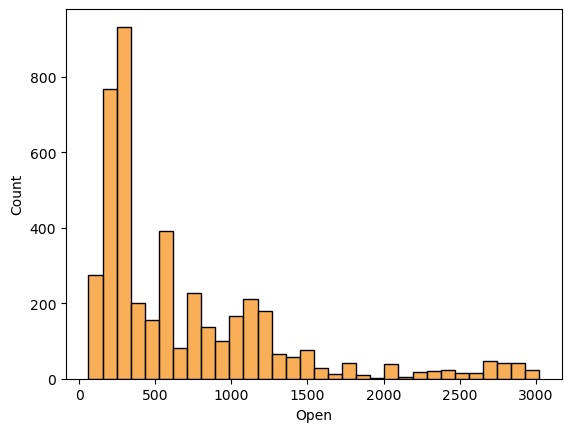

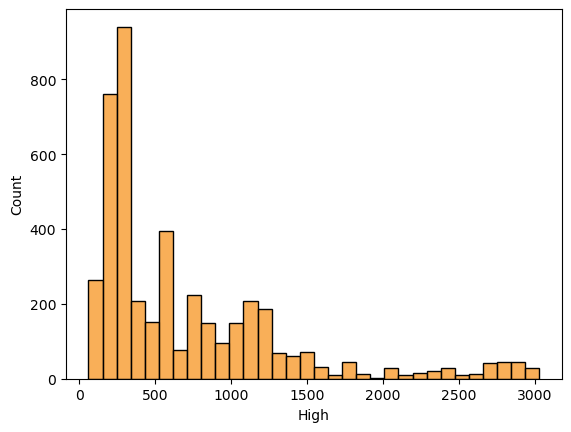

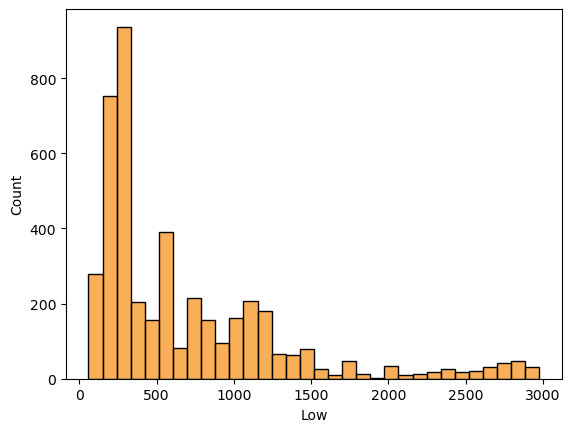

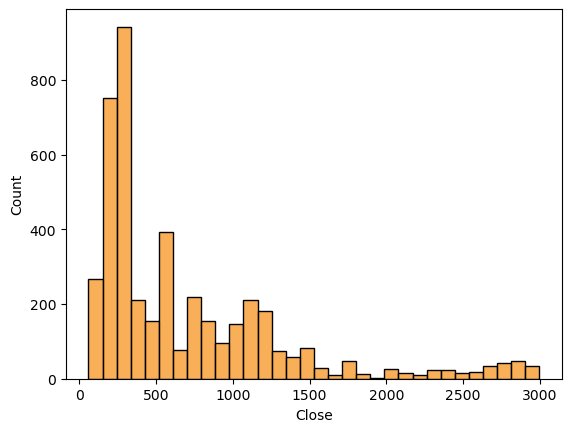

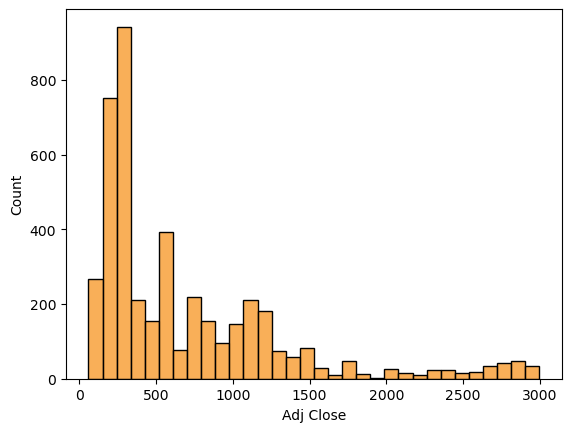

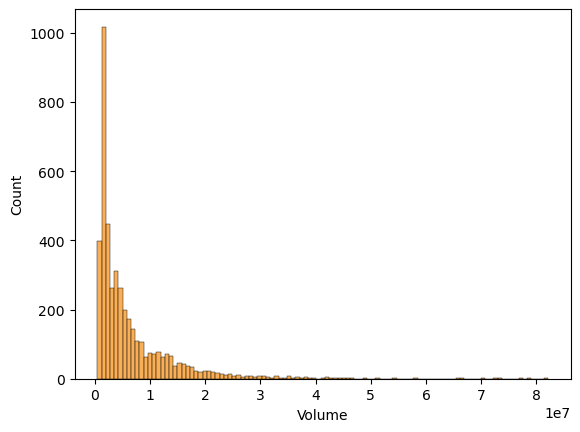

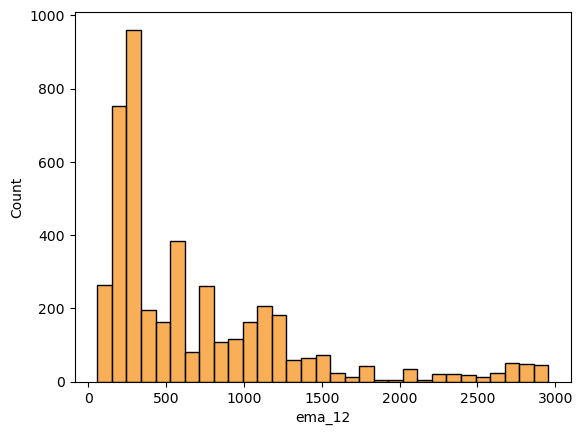

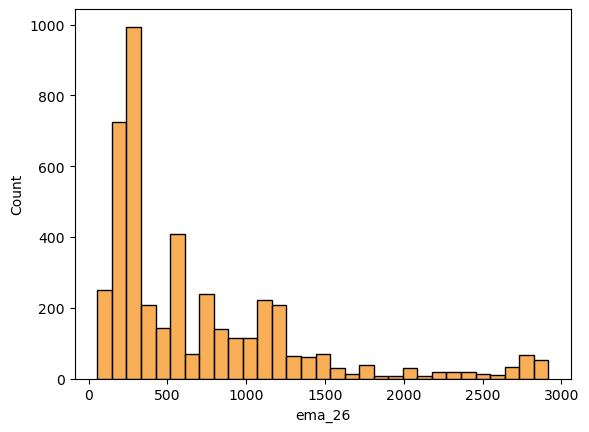

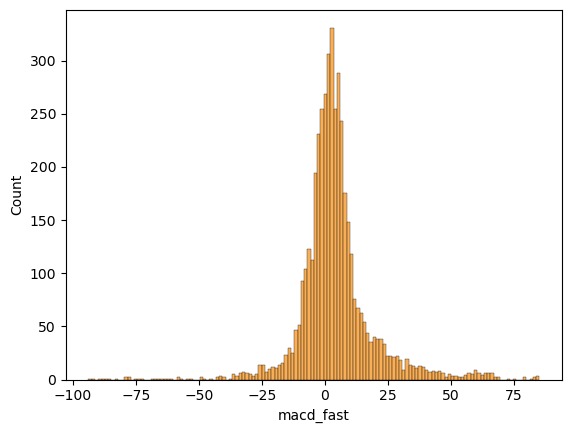

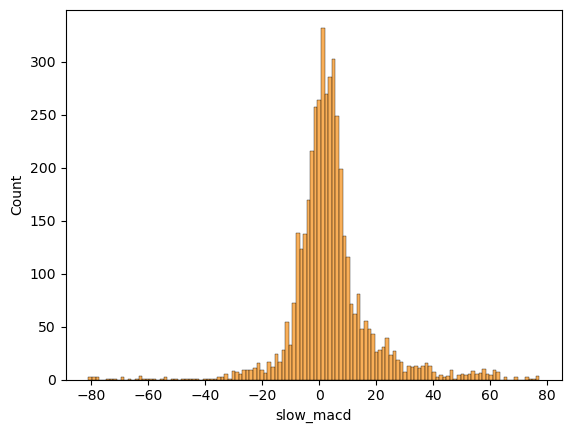

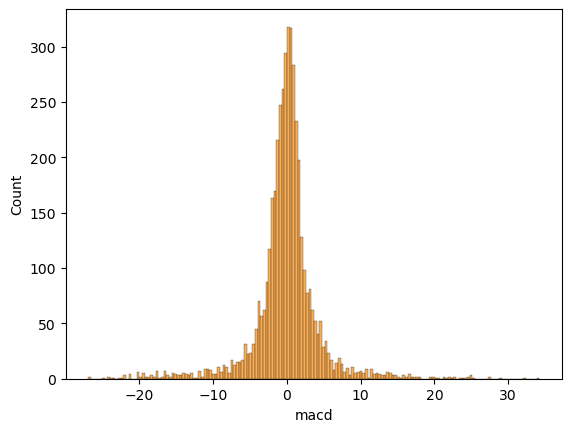

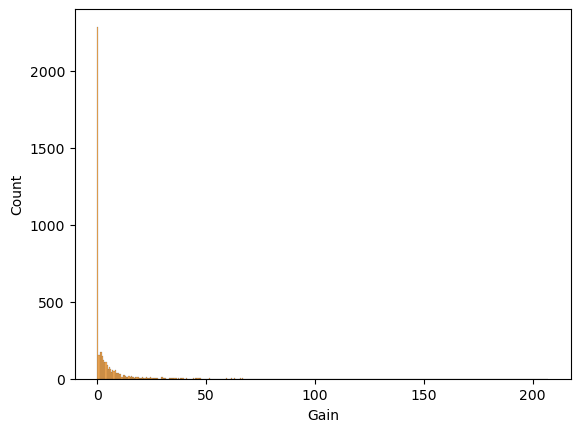

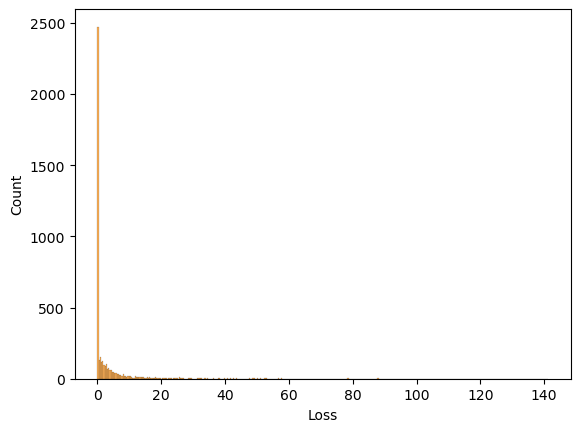

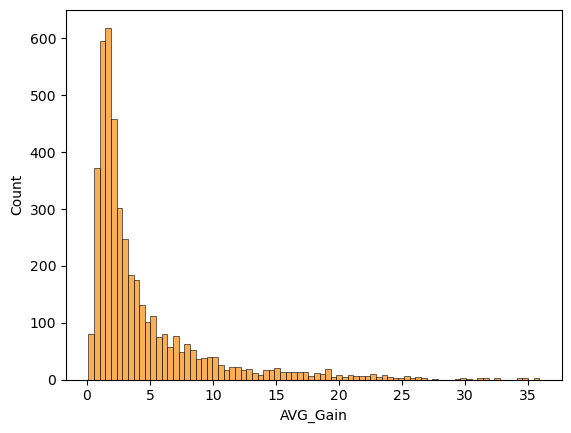

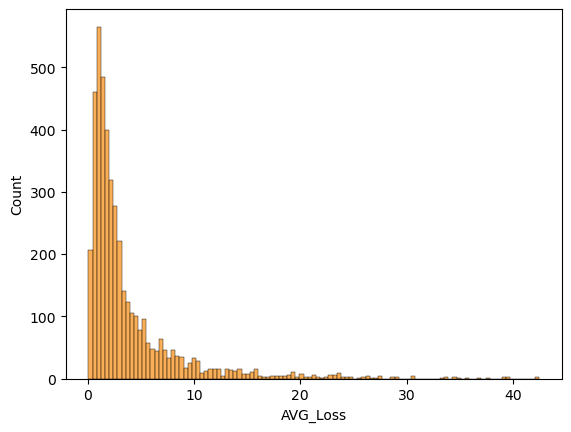

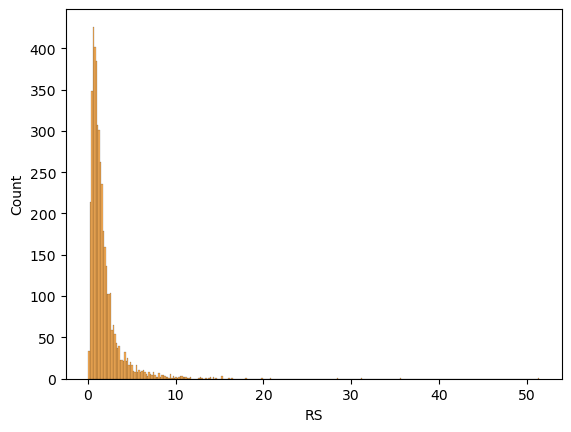

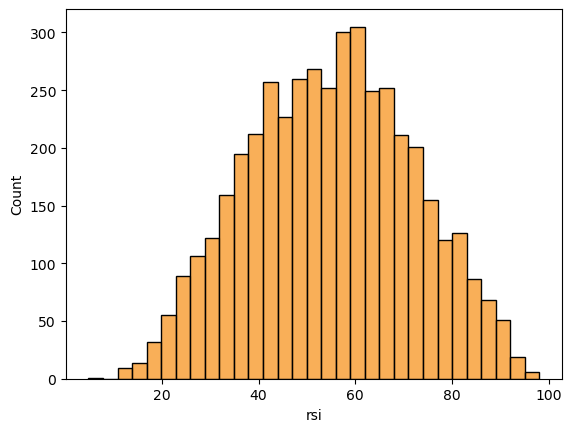

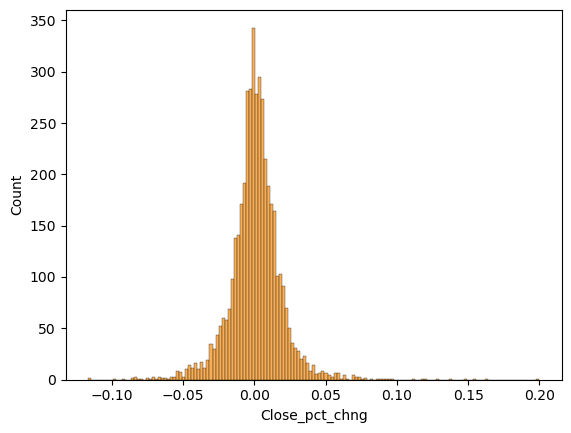

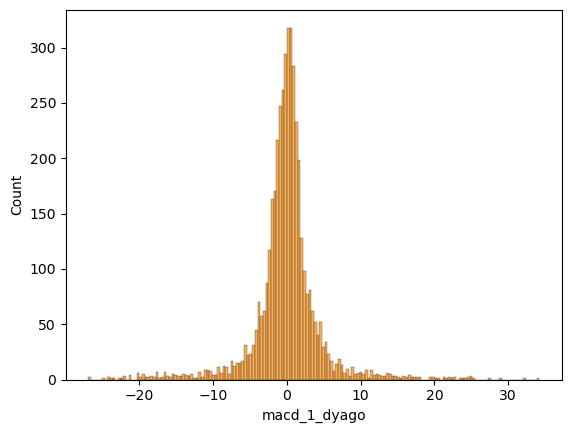

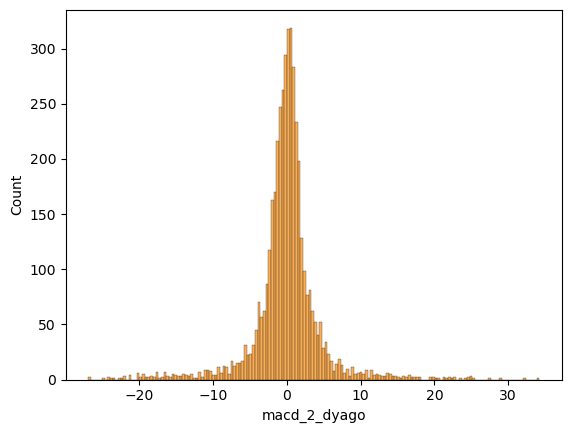

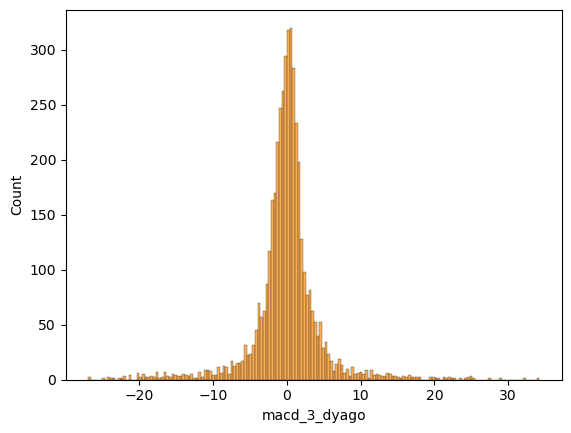

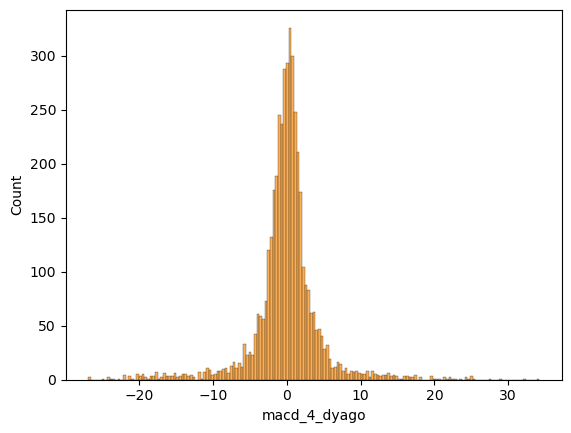

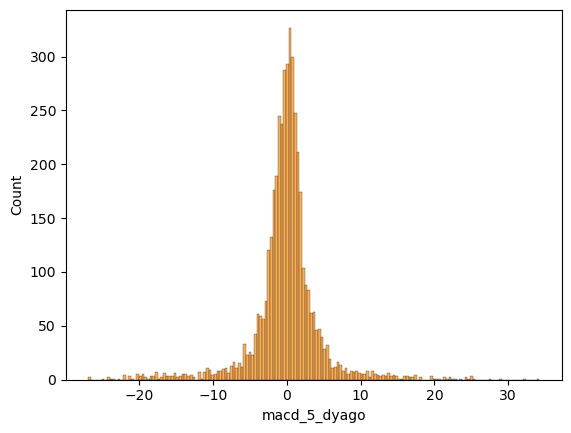

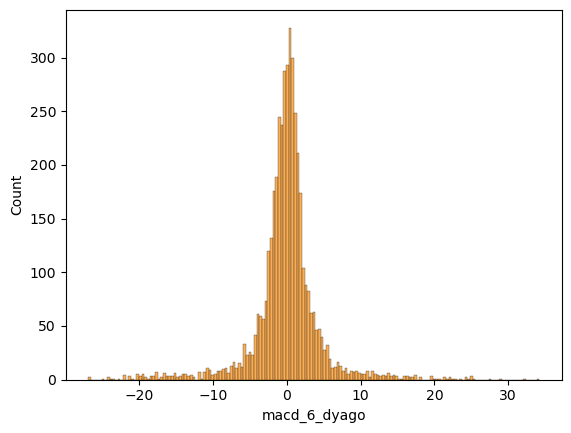

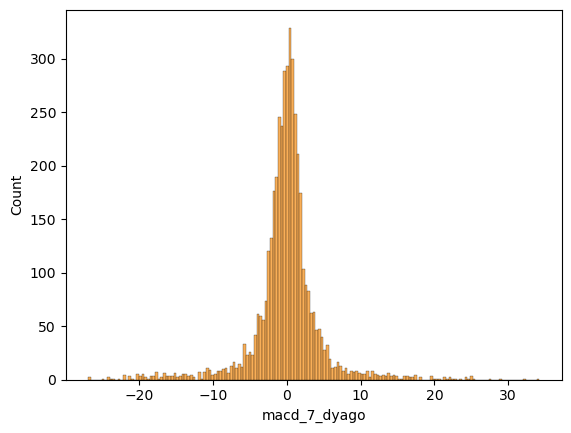

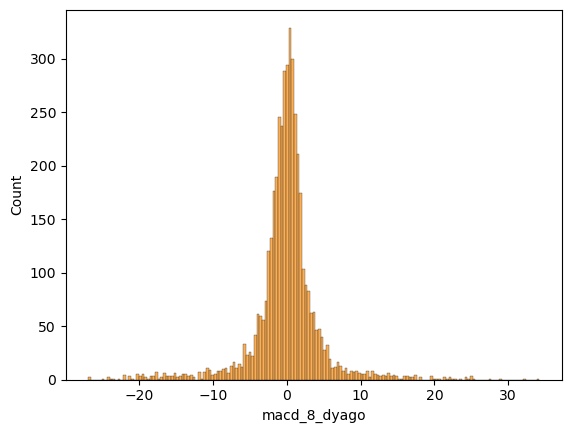

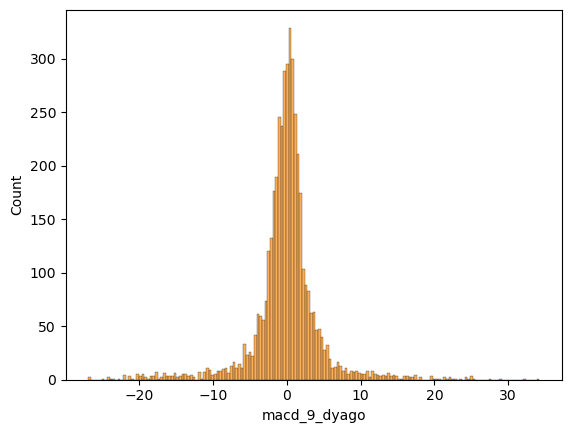

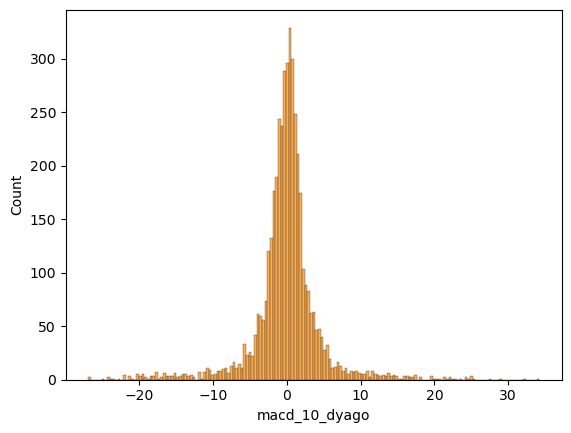

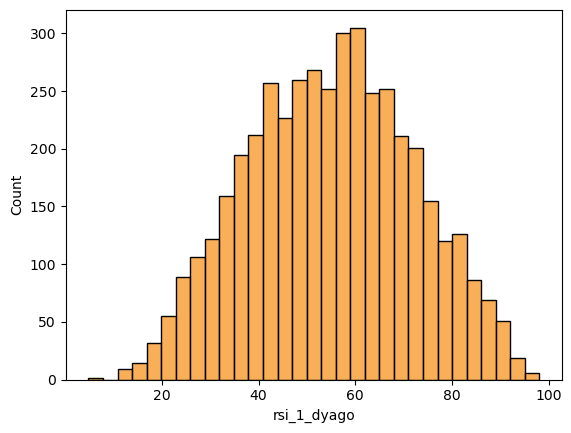

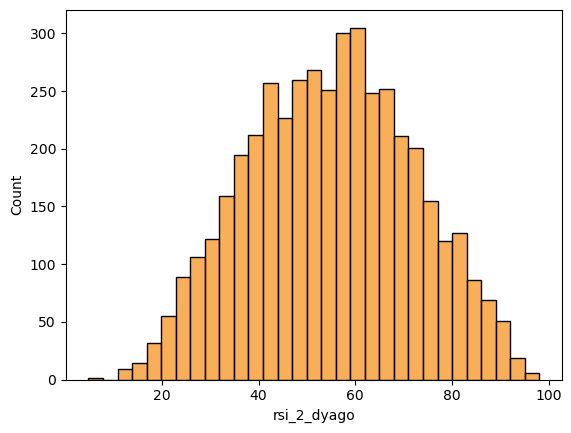

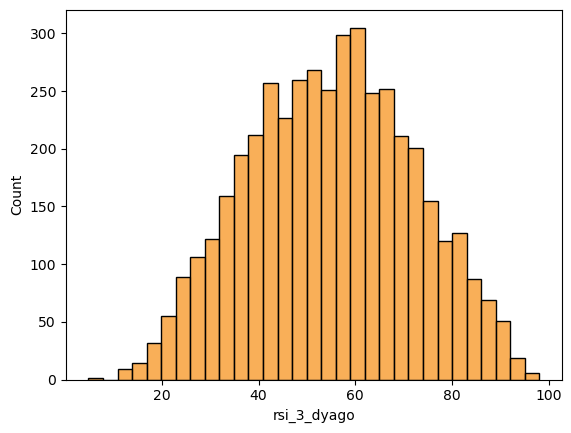

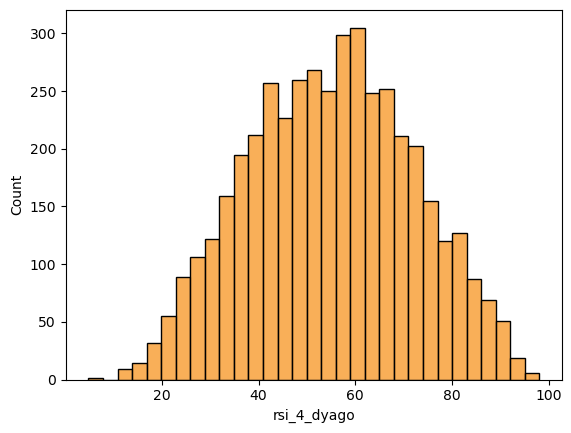

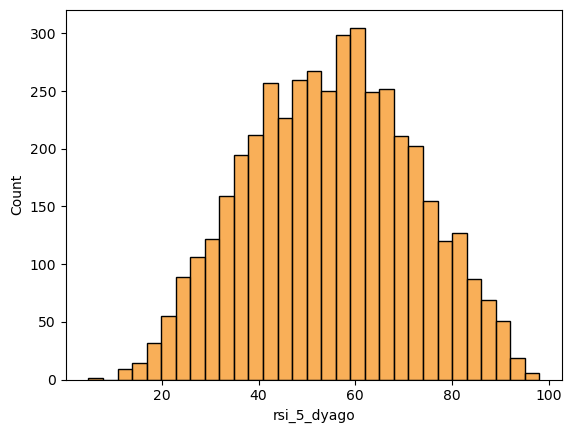

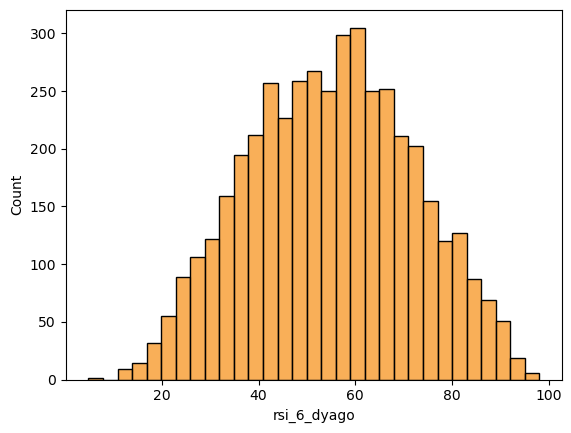

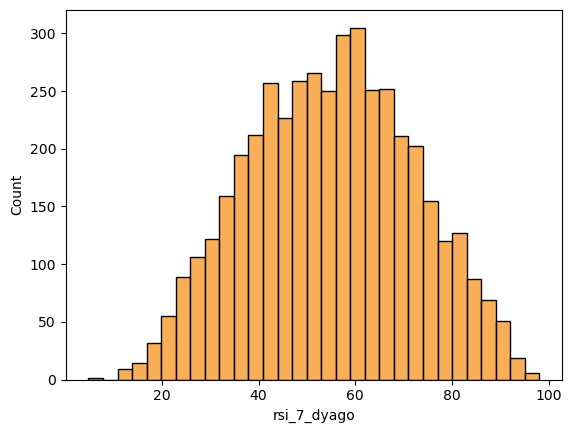

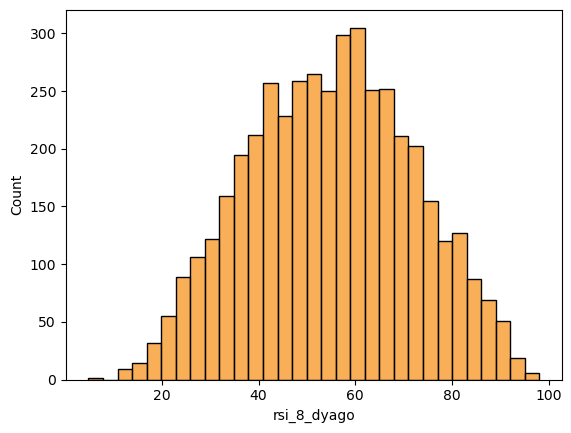

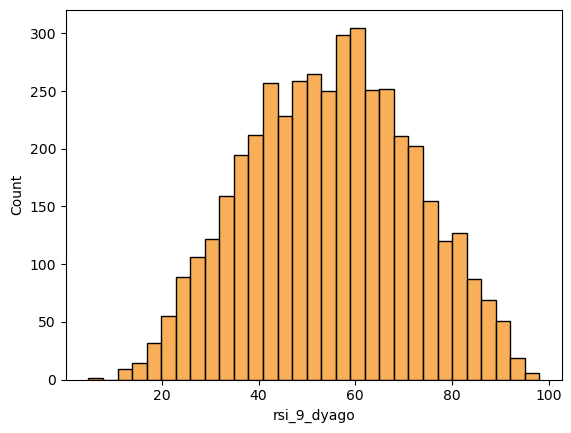

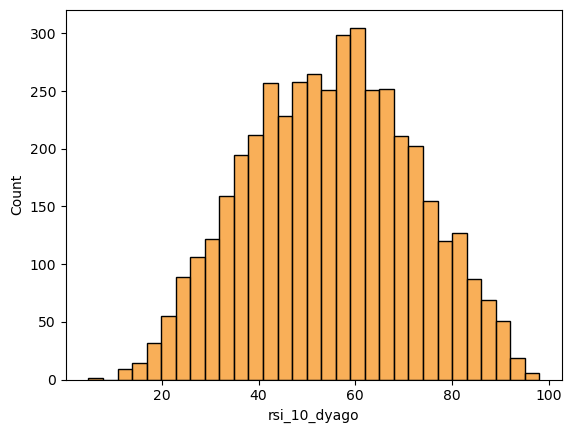

In [52]:
for feat in data_reading.columns:
    if data_reading[feat].dtype != 'object':
        sns.histplot(data_reading, x=feat, color=palette[0])
        plt.show()

In [12]:
data_reading['ema_12'] = data_reading['Close'].ewm(span=12).mean()
data_reading['ema_26'] = data_reading['Close'].ewm(span=26).mean()

In [13]:
data_reading['macd_fast'] = data_reading['ema_12'] - data_reading['ema_26']
In [15]: data_reading['slow_macd'] = data_reading['macd_fast'].ewm(span=9).mean()
In [16]: data_reading['macd'] = data_reading['macd_fast'] - data_reading['slow_macd']

In [14]:
change = data_reading['Close'].diff(1)
data_reading['Gain'] = change.mask(change<0,0)
data_reading['Loss'] = abs(change.mask(change>0,0))
data_reading['AVG_Gain'] = data_reading.Gain.rolling(14).mean()
data_reading['AVG_Loss'] = data_reading.Loss.rolling(14).mean()
data_reading['RS'] = data_reading['AVG_Gain']/data_reading['AVG_Loss']
data_reading['rsi'] = 100 - (100/(1+data_reading['RS']))

array([[<Axes: >],
       [<Axes: >]], dtype=object)

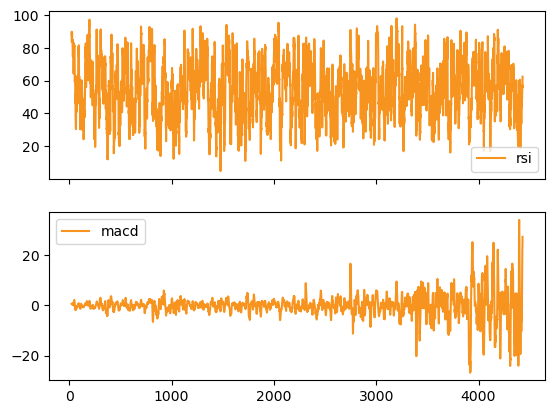

In [57]:
data_reading[['rsi', 'macd']].plot(kind='line', color=palette, subplots=True, layout=(2,1))

In [58]:
data_reading['Close_pct_chng'] = data_reading['Close'].pct_change()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\3441345979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reading['Close_pct_chng'] = data_reading['Close'].pct_change()


In [59]:
data_reading.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
ema_12            0
ema_26            0
macd_fast         0
slow_macd         0
macd              0
Gain              0
Loss              0
AVG_Gain          0
AVG_Loss          0
RS                0
rsi               0
Close_pct_chng    1
macd_1_dyago      0
macd_2_dyago      0
macd_3_dyago      0
macd_4_dyago      0
macd_5_dyago      0
macd_6_dyago      0
macd_7_dyago      0
macd_8_dyago      0
macd_9_dyago      0
macd_10_dyago     0
rsi_1_dyago       0
rsi_2_dyago       0
rsi_3_dyago       0
rsi_4_dyago       0
rsi_5_dyago       0
rsi_6_dyago       0
rsi_7_dyago       0
rsi_8_dyago       0
rsi_9_dyago       0
rsi_10_dyago      0
dtype: int64

In [18]:
days_macd = [1,2,3,4,5,6,7,8,9,10]
days_rsi = [1,2,3,4,5,6,7,8,9,10]

In [19]:
for ds in days_macd:
    data_reading[f'macd_{ds}_dyago'] = data_reading['macd'].shift(ds)


In [20]:
for dr in days_rsi:
    data_reading[f'rsi_{dr}_dyago'] = data_reading['rsi'].shift(dr)

In [21]:
data_reading.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ema_12,ema_26,macd_fast,...,rsi_1_dyago,rsi_2_dyago,rsi_3_dyago,rsi_4_dyago,rsi_5_dyago,rsi_6_dyago,rsi_7_dyago,rsi_8_dyago,rsi_9_dyago,rsi_10_dyago
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,50.220219,50.220219,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.380922,52.291425,0.089497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,53.307429,53.176475,0.130954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,53.048605,52.983864,0.064741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,53.049814,52.999910,0.049904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
In [25]: data_reading[['macd', 'macd_1_dyago']]

,macd,macd_1_dyago
0,0.000000,NaN
1,0.039776,0.000000
2,0.047941,0.039776
3,-0.012082,0.047941
4,-0.018911,-0.012082
...,...,...
4426,13.312184,7.243642
4427,16.659076,13.312184
4428,22.924694,16.659076
4429,23.799019,22.924694


In [23]:
data_reading = data_reading.dropna()

In [24]:
data_reading.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ema_12',
       'ema_26', 'macd_fast', 'slow_macd', 'macd', 'Gain', 'Loss', 'AVG_Gain',
       'AVG_Loss', 'RS', 'rsi', 'Close_pct_chng', 'macd_1_dyago',
       'macd_2_dyago', 'macd_3_dyago', 'macd_4_dyago', 'macd_5_dyago',
       'macd_6_dyago', 'macd_7_dyago', 'macd_8_dyago', 'macd_9_dyago',
       'macd_10_dyago', 'rsi_1_dyago', 'rsi_2_dyago', 'rsi_3_dyago',
       'rsi_4_dyago', 'rsi_5_dyago', 'rsi_6_dyago', 'rsi_7_dyago',
       'rsi_8_dyago', 'rsi_9_dyago', 'rsi_10_dyago'],
      dtype='object')

In [25]:
Property = ['macd_1_dyago', 'macd_2_dyago', 'macd_3_dyago',
'macd_4_dyago', 'macd_5_dyago', 'macd_6_dyago', 'macd_7_dyago',
'macd_8_dyago', 'macd_9_dyago','macd_10_dyago',
'rsi_1_dyago', 'rsi_2_dyago', 'rsi_3_dyago',
'rsi_4_dyago', 'rsi_5_dyago', 'rsi_6_dyago', 'rsi_7_dyago',
'rsi_8_dyago', 'rsi_9_dyago', 'rsi_10_dyago']
target = ['Close_pct_chng']

In [26]:
split_ind = 4000


In [27]:
In [30]: df_tr = data_reading.iloc[5:split_ind]
df_ts = data_reading.iloc[split_ind:]

In [28]:
df_tr.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
ema_12            0
ema_26            0
macd_fast         0
slow_macd         0
macd              0
Gain              0
Loss              0
AVG_Gain          0
AVG_Loss          0
RS                0
rsi               0
Close_pct_chng    0
macd_1_dyago      0
macd_2_dyago      0
macd_3_dyago      0
macd_4_dyago      0
macd_5_dyago      0
macd_6_dyago      0
macd_7_dyago      0
macd_8_dyago      0
macd_9_dyago      0
macd_10_dyago     0
rsi_1_dyago       0
rsi_2_dyago       0
rsi_3_dyago       0
rsi_4_dyago       0
rsi_5_dyago       0
rsi_6_dyago       0
rsi_7_dyago       0
rsi_8_dyago       0
rsi_9_dyago       0
rsi_10_dyago      0
dtype: int64

In [29]:
x_tr = df_tr[Property]
y_tr = df_tr[target]
x_ts = df_ts[Property]
y_ts = df_ts[target]


In [30]:
print(x_tr.shape)
print(x_ts.shape)

(3995, 20)
(407, 20)


In [31]:
std_scaler = StandardScaler().fit(x_tr)
x_tr = std_scaler.transform(x_tr)
x_ts = std_scaler.transform(x_ts)


In [32]:
dim = x_tr.shape[1]
dim

20

In [33]:
dense_act = 'elu'
recur_act = 'tanh'
eps = 500
lrning_rt = .001
ls = 'mae'
opt = tf.keras.optimizers.SGD(learning_rate=lrning_rt)

In [35]:
model = tf.keras.models.Sequential([
 tf.keras.layers.LSTM(13, recurrent_activation=recur_act, input_shape=[dim,1]),
 tf.keras.layers.Dropout(.2),
 tf.keras.layers.Dense(16, activation=dense_act),
 tf.keras.layers.Dense(8, activation=dense_act),
 tf.keras.layers.Dropout(.2),
 tf.keras.layers.Dense(12, activation=dense_act),
 tf.keras.layers.Dense(1)
])
model.compile(loss=ls, optimizer=opt)


In [36]:
history = model.fit(x_tr, y_tr,
 validation_split=.2,
 epochs=eps, batch_size=1024)

Epoch 1/500
4/4 [==============================] - 4s 237ms/step - loss: 0.0356 - val_loss: 0.0244
Epoch 2/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0344 - val_loss: 0.0242
Epoch 3/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0334 - val_loss: 0.0239
Epoch 4/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0333 - val_loss: 0.0237
Epoch 5/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0325 - val_loss: 0.0235
Epoch 6/500
4/4 [==============================] - 0s 41ms/step - loss: 0.0338 - val_loss: 0.0233
Epoch 7/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0321 - val_loss: 0.0231
Epoch 8/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0328 - val_loss: 0.0229
Epoch 9/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0322 - val_loss: 0.0227
Epoch 10/500
4/4 [==============================] - 0s 47ms/step - loss: 0.0321 - val_loss: 0.0225
Epoch 11/500
4/4 [

Epoch 84/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0255 - val_loss: 0.0155
Epoch 85/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0256 - val_loss: 0.0154
Epoch 86/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0250 - val_loss: 0.0153
Epoch 87/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0249 - val_loss: 0.0153
Epoch 88/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0251 - val_loss: 0.0152
Epoch 89/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0247 - val_loss: 0.0152
Epoch 90/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0249 - val_loss: 0.0152
Epoch 91/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0239 - val_loss: 0.0151
Epoch 92/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0249 - val_loss: 0.0151
Epoch 93/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0250 - val_loss: 0.0150
Epoch 94/5

4/4 [==============================] - 0s 63ms/step - loss: 0.0221 - val_loss: 0.0136
Epoch 167/500
4/4 [==============================] - 0s 57ms/step - loss: 0.0223 - val_loss: 0.0137
Epoch 168/500
4/4 [==============================] - 0s 64ms/step - loss: 0.0219 - val_loss: 0.0136
Epoch 169/500
4/4 [==============================] - 0s 58ms/step - loss: 0.0224 - val_loss: 0.0136
Epoch 170/500
4/4 [==============================] - 0s 49ms/step - loss: 0.0226 - val_loss: 0.0136
Epoch 171/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0222 - val_loss: 0.0136
Epoch 172/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0219 - val_loss: 0.0136
Epoch 173/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0223 - val_loss: 0.0136
Epoch 174/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0225 - val_loss: 0.0136
Epoch 175/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0216 - val_loss: 0.0136
Epoch 176/500


4/4 [==============================] - 0s 45ms/step - loss: 0.0210 - val_loss: 0.0131
Epoch 249/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0212 - val_loss: 0.0131
Epoch 250/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0208 - val_loss: 0.0131
Epoch 251/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0209 - val_loss: 0.0131
Epoch 252/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0207 - val_loss: 0.0131
Epoch 253/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0205 - val_loss: 0.0130
Epoch 254/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0203 - val_loss: 0.0131
Epoch 255/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0210 - val_loss: 0.0130
Epoch 256/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0208 - val_loss: 0.0130
Epoch 257/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0207 - val_loss: 0.0130
Epoch 258/500


4/4 [==============================] - 0s 56ms/step - loss: 0.0195 - val_loss: 0.0129
Epoch 331/500
4/4 [==============================] - 0s 56ms/step - loss: 0.0198 - val_loss: 0.0129
Epoch 332/500
4/4 [==============================] - 0s 61ms/step - loss: 0.0196 - val_loss: 0.0129
Epoch 333/500
4/4 [==============================] - 0s 57ms/step - loss: 0.0200 - val_loss: 0.0129
Epoch 334/500
4/4 [==============================] - 0s 59ms/step - loss: 0.0195 - val_loss: 0.0129
Epoch 335/500
4/4 [==============================] - 0s 57ms/step - loss: 0.0196 - val_loss: 0.0129
Epoch 336/500
4/4 [==============================] - 0s 57ms/step - loss: 0.0197 - val_loss: 0.0128
Epoch 337/500
4/4 [==============================] - 0s 62ms/step - loss: 0.0197 - val_loss: 0.0128
Epoch 338/500
4/4 [==============================] - 0s 52ms/step - loss: 0.0195 - val_loss: 0.0128
Epoch 339/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0198 - val_loss: 0.0128
Epoch 340/500


4/4 [==============================] - 0s 46ms/step - loss: 0.0186 - val_loss: 0.0128
Epoch 413/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0190 - val_loss: 0.0128
Epoch 414/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0187 - val_loss: 0.0127
Epoch 415/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0188 - val_loss: 0.0127
Epoch 416/500
4/4 [==============================] - 0s 41ms/step - loss: 0.0187 - val_loss: 0.0127
Epoch 417/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0188 - val_loss: 0.0128
Epoch 418/500
4/4 [==============================] - 0s 46ms/step - loss: 0.0189 - val_loss: 0.0128
Epoch 419/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0188 - val_loss: 0.0127
Epoch 420/500
4/4 [==============================] - 0s 45ms/step - loss: 0.0186 - val_loss: 0.0127
Epoch 421/500
4/4 [==============================] - 0s 41ms/step - loss: 0.0190 - val_loss: 0.0128
Epoch 422/500


4/4 [==============================] - 0s 44ms/step - loss: 0.0181 - val_loss: 0.0126
Epoch 495/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0182 - val_loss: 0.0126
Epoch 496/500
4/4 [==============================] - 0s 41ms/step - loss: 0.0181 - val_loss: 0.0126
Epoch 497/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0180 - val_loss: 0.0126
Epoch 498/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0180 - val_loss: 0.0126
Epoch 499/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0181 - val_loss: 0.0126
Epoch 500/500
4/4 [==============================] - 0s 47ms/step - loss: 0.0179 - val_loss: 0.0126


<Axes: >

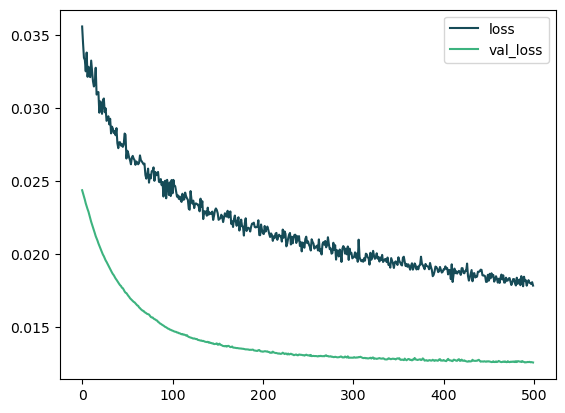

In [37]:
pd.DataFrame(history.history).plot(color=palette)

In [38]:
score = model.evaluate(x_ts, y_ts)

13/13 [==============================] - 0s 6ms/step - loss: 0.0160
